<a href="https://colab.research.google.com/github/HarikaLingamsetty/Machine-Learning/blob/main/BivariateAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

IMPORTING THE DATASET

In [ ]:
data= pd.read_csv('dataset.csv')
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
data.duplicated().sum()

0

BIVARIATE ANALYSIS OF CONTINUOUS VARIABLES

In [ ]:
data[['Age','Debt', 'YearsEmployed','CreditScore','Income']].corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202177,0.391464,0.187327,0.018719
Debt,0.202177,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.051345
CreditScore,0.187327,0.271207,0.322330,1.000000,0.063692
Income,0.018719,0.123121,0.051345,0.063692,1.000000


(0.0, 20000.0)

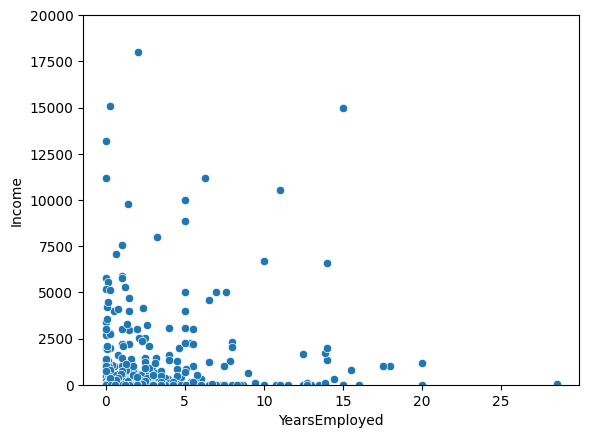

In [ ]:
sns.scatterplot(data=data, x='YearsEmployed', y='Income')
plt.ylim(0,20000)

BIVARIATE ANALYSIS OF CATEGORICAL VARIABLES VS CONTINUOUS VARIABLES

In [ ]:
data.groupby(by='Approved').agg('mean')[['Age','Debt', 'YearsEmployed','CreditScore','Income']]

<ipython-input-50-fab29dd176d0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by='Approved').agg('mean')[['Age','Debt', 'YearsEmployed','CreditScore','Income']]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


<Axes: xlabel='Age', ylabel='Density'>

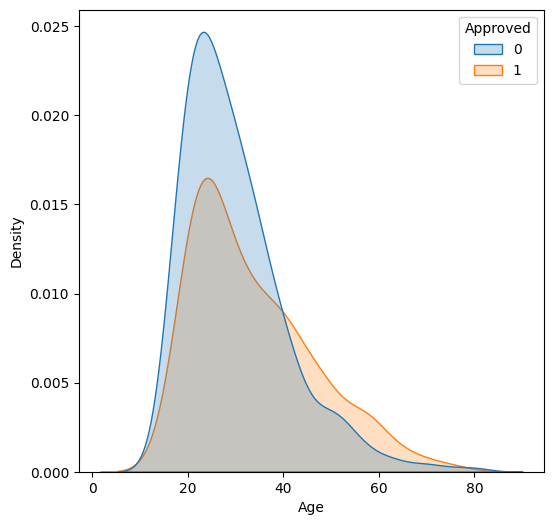

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=data,x='Age',hue='Approved', fill=True)

<Axes: xlabel='CreditScore', ylabel='Density'>

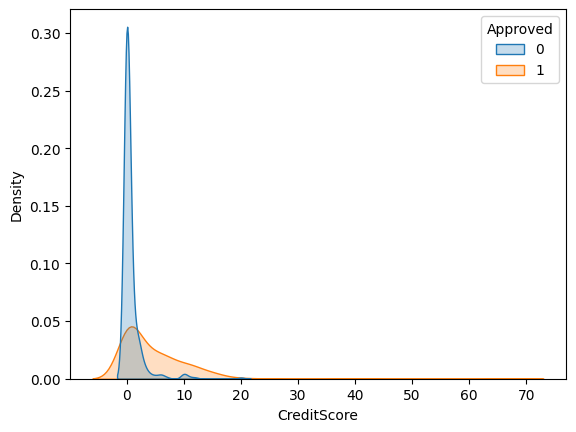

In [ ]:
sns.kdeplot(data=data, x='CreditScore', hue='Approved', fill=True)

<Axes: xlabel='YearsEmployed', ylabel='Density'>

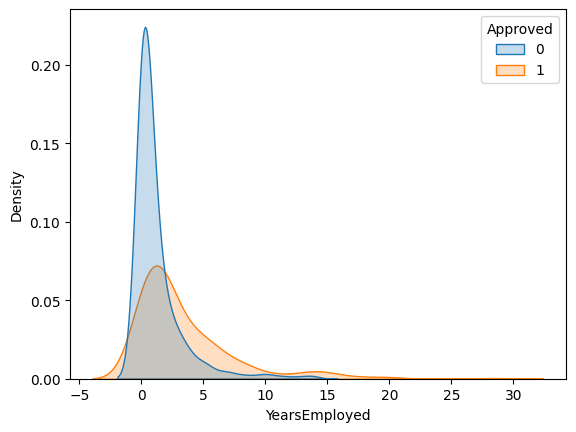

In [ ]:
sns.kdeplot(data=data, x='YearsEmployed', hue='Approved', fill=True)

BIVARIATE ANALYSIS OF CATEGORICAL VARIABLES VS CATEGORICAL VARIBALES

<Axes: xlabel='Approved', ylabel='count'>

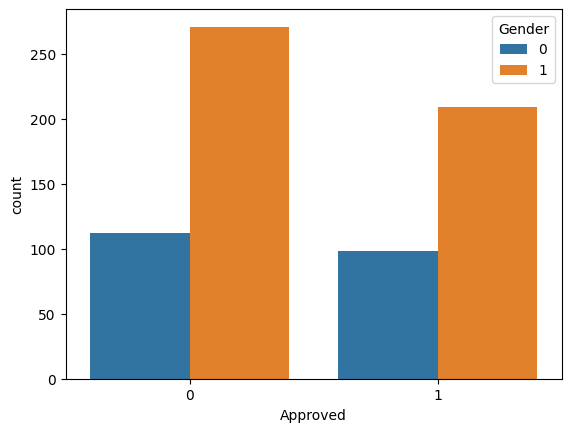

In [ ]:
sns.countplot(data=data,x='Approved',hue='Gender')

In [ ]:
pd.crosstab(data.Gender, data.Approved, margins=True)

Approved,0,1,All
Gender,,,
0,112,98,210
1,271,209,480
All,383,307,690


In [ ]:
all = pd.crosstab(data.Gender, data.Approved, margins=True)['All']
pd.crosstab(data.Gender, data.Approved).divide(all,axis=0).dropna()

Approved,0,1
Gender,,
0,0.533333,0.466667
1,0.564583,0.435417


<Axes: xlabel='Approved', ylabel='count'>

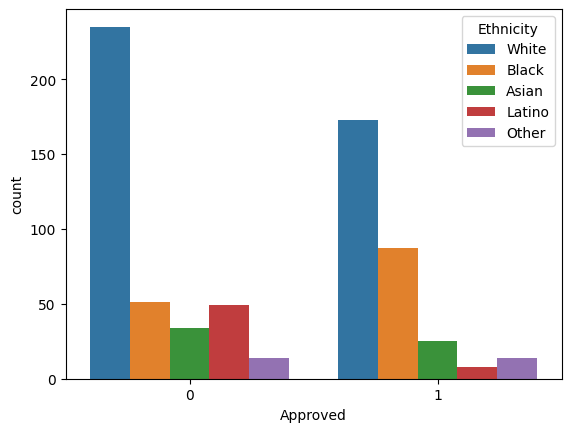

In [ ]:
sns.countplot(data=data,x='Approved', hue='Ethnicity')

In [ ]:
data.groupby(by='Approved').agg('mean')[['Age','Debt','YearsEmployed','CreditScore','Income']]

<ipython-input-58-5cb74bc49b6b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by='Approved').agg('mean')[['Age','Debt','YearsEmployed','CreditScore','Income']]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


In [ ]:
data[data.Ethnicity=='Latino'][['Age','Debt','YearsEmployed','CreditScore','Income']].agg('mean')

Age               38.024386
Debt               5.377105
YearsEmployed      1.406316
CreditScore        1.859649
Income           434.649123
dtype: float64

<Axes: xlabel='Approved', ylabel='count'>

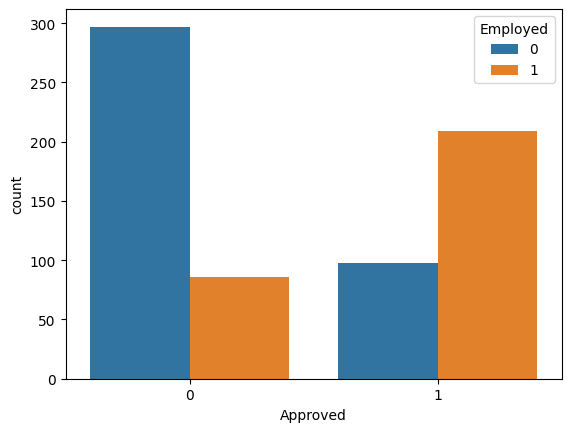

In [ ]:
sns.countplot(data=data, x='Approved', hue='Employed')

<Axes: xlabel='Approved', ylabel='count'>

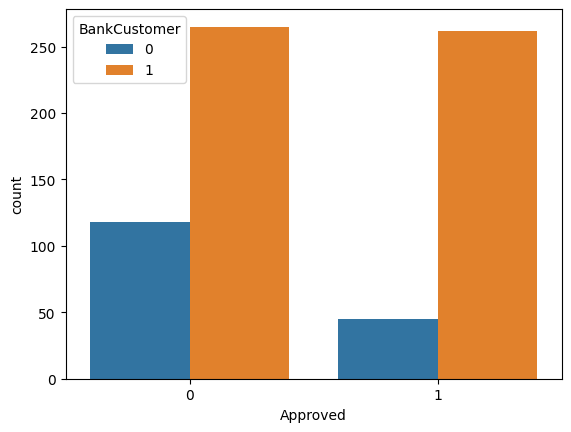

In [ ]:
sns.countplot(data=data, x='Approved', hue='BankCustomer')

In [ ]:
S